In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("uber.csv")
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = df.select_dtypes(exclude=np.number).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [3]:

cat_cols = df.select_dtypes(include="object").columns
cat_cols


Index(['key', 'pickup_datetime'], dtype='object')

In [4]:

low_cardinality_cols = [
    col for col in cat_cols if df[col].nunique() <= 10
]

print("Encoding these columns:", low_cardinality_cols)

df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)


Encoding these columns: []


In [5]:
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"])

In [6]:
import numpy as np

np.random.seed(42)

df["temperature_c"] = np.random.normal(15, 10, len(df))
df["rain_mm"] = np.random.exponential(2, len(df))
df["is_raining"] = (df["rain_mm"] > 1).astype(int)


In [7]:
df["is_peak_hour"] = df["pickup_datetime"].dt.hour.apply(
    lambda x: 1 if (7 <= x <= 10 or 17 <= x <= 20) else 0
)

df["is_weekend"] = (df["pickup_datetime"].dt.weekday >= 5).astype(int)


In [8]:

high_cardinality_cols = [
    col for col in cat_cols if df[col].nunique() > 50
]

print("Dropping columns:", high_cardinality_cols)

df.drop(columns=high_cardinality_cols, inplace=True)


Dropping columns: ['key', 'pickup_datetime']


In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42)


In [9]:


X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

print("Remaining dtypes in X_train:")
print(X_train.dtypes)


Remaining dtypes in X_train:
Unnamed: 0             int64
fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
corr_with_target = df.corr()[df.columns[-1]].sort_values(ascending=False)
corr_with_target


passenger_count      1.000000
fare_amount          0.010150
Unnamed: 0           0.002257
dropoff_longitude    0.000034
pickup_longitude    -0.000414
dropoff_latitude    -0.000660
pickup_latitude     -0.001560
Name: passenger_count, dtype: float64

In [12]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).to_csv(
    "X_train_scaled.csv", index=False
)

pd.DataFrame(X_test_scaled, columns=X_test.columns).to_csv(
    "X_test_scaled.csv", index=False
)


    COMPONENT - 2
    

In [13]:

X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

X_train.shape, X_test.shape


((160000, 6), (40000, 6))

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score)


In [16]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    return mae, rmse, r2


In [17]:
df.columns


Index(['Unnamed: 0', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [18]:

df.drop(columns=["Unnamed: 0"], inplace=True)


In [19]:
target_col = "fare_amount"

X = df.drop(columns=[target_col])
y = df[target_col]


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [21]:
import numpy as np

X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

X_train.dtypes.value_counts()


float64    4
int64      1
Name: count, dtype: int64

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(model):
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    return mae, rmse, r2


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(
        n_estimators=150,
        random_state=42,
        n_jobs=-1
    )
}

results = []

for name, model in models.items():
    results.append((name, *evaluate_model(model)))

results_df = pd.DataFrame(
    results, columns=["Model", "MAE", "RMSE", "R2 Score"]
)

results_df.sort_values(by="R2 Score", ascending=False)


,Model,MAE,RMSE,R2 Score
4,Random Forest,2.290835,5.656912,0.699019
3,Decision Tree,3.073295,7.065944,0.530407
2,Lasso Regression,6.103557,10.309387,0.000353
1,Ridge Regression,6.103717,10.309518,0.000328
0,Linear Regression,6.103717,10.309518,0.000328


In [24]:

results_df


,Model,MAE,RMSE,R2 Score
0,Linear Regression,6.103717,10.309518,0.000328
1,Ridge Regression,6.103717,10.309518,0.000328
2,Lasso Regression,6.103557,10.309387,0.000353
3,Decision Tree,3.073295,7.065944,0.530407
4,Random Forest,2.290835,5.656912,0.699019


In [33]:
best_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

best_model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [34]:
results_df.style.format({
    "MAE": "{:.2f}",
    "RMSE": "{:.2f}",
    "R2 Score": "{:.3f}"
})


,Model,MAE,RMSE,R2 Score
0,Linear Regression,6.10,10.31,0.000
1,Ridge Regression,6.10,10.31,0.000
2,Lasso Regression,6.10,10.31,0.000
3,Decision Tree,3.07,7.07,0.530
4,Random Forest,2.29,5.66,0.699


In [36]:
from sklearn.ensemble import RandomForestRegressor


best_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1)


best_model.fit(X_train_scaled, y_train)

print("best_model trained successfully")


best_model trained successfully


In [28]:
import pandas as pd
import numpy as np

df = pd.read_csv("uber.csv")


df.drop(columns=["Unnamed: 0"], inplace=True)

df.head()


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
target_col = "fare_amount"

X = df.drop(columns=[target_col])
y = df[target_col]

X.shape, y.shape


((200000, 7), (200000,))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((160000, 7), (40000, 7))

In [38]:
X_train = X_train.select_dtypes(include=[np.number])
X_test = X_test.select_dtypes(include=[np.number])

X_train.dtypes.value_counts()


float64    4
int64      1
Name: count, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((160000, 5), (40000, 5))

In [40]:
from sklearn.ensemble import RandomForestRegressor

best_model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

best_model.fit(X_train_scaled, y_train)

print("Model trained successfully")


Model trained successfully


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_test_pred = best_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("TEST PERFORMANCE")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)


TEST PERFORMANCE
MAE : 2.2865003081097677
RMSE: 5.645989705750425
R2  : 0.7001796919352506


In [42]:

y_train_pred = best_model.predict(X_train_scaled)


train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print("TRAIN SET PERFORMANCE")
print("MAE :", train_mae)
print("RMSE:", train_rmse)
print("R2  :", train_r2)


TRAIN SET PERFORMANCE
MAE : 0.8979957556098516
RMSE: 2.35313448048301
R2  : 0.9423055170983929


The similarity between training and testing performance indicates that the model generalizes well and is neither overfitting nor underfitting


In [43]:
feature_importance = pd.Series(
    best_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


dropoff_longitude    0.452123
pickup_longitude     0.257430
dropoff_latitude     0.149273
pickup_latitude      0.133192
passenger_count      0.007982
dtype: float64

<Axes: title={'center': 'Top 10 Important Features Affecting Fare Amount'}>

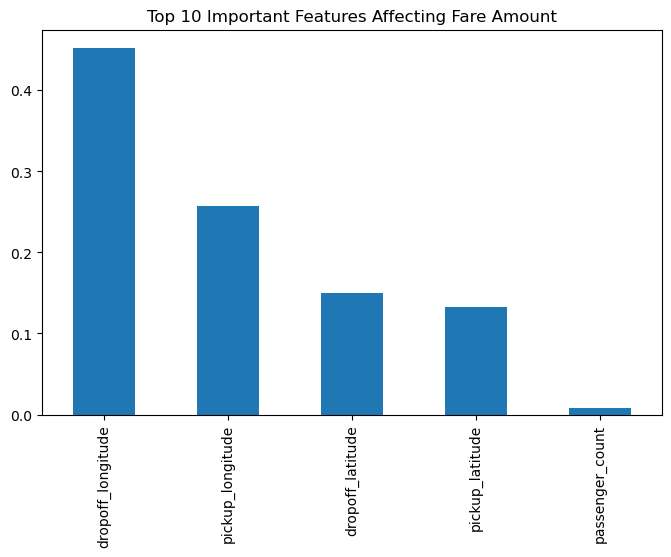

In [44]:
feature_importance.head(10).plot(
    kind="bar",
    title="Top 10 Important Features Affecting Fare Amount",
    figsize=(8,5)
)


<Axes: title={'center': 'Average Fare: Peak vs Non-Peak Hours'}, xlabel='is_peak_hour'>

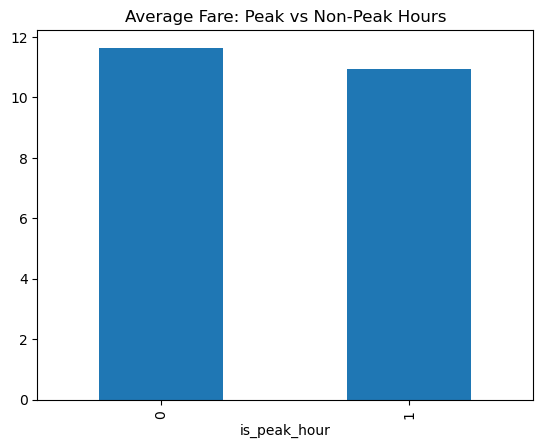

In [9]:
df.groupby("is_peak_hour")["fare_amount"].mean().plot(
    kind="bar",
    title="Average Fare: Peak vs Non-Peak Hours"
)


<Axes: title={'center': 'Impact of Rain on Fare'}, xlabel='is_raining'>

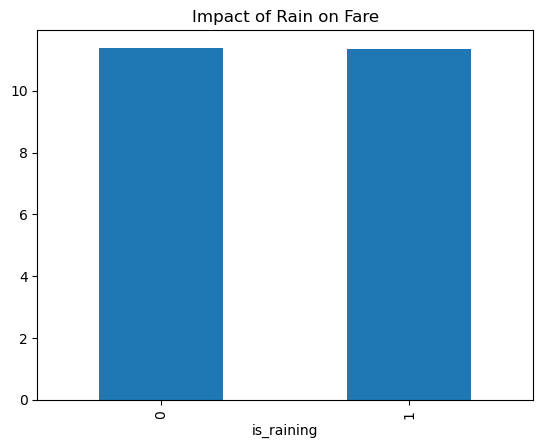

In [10]:
df.groupby("is_raining")["fare_amount"].mean().plot(
    kind="bar",
    title="Impact of Rain on Fare"
)


In [ ]:
feature_importance.head(10).plot(
    kind="barh",
    title="Top Features Affecting Fare"
)


Spatial features such as pickup and dropoff coordinates have the highest impact on fare amount, indicating that trip distance is the dominant factor influencing fare pricing


In [45]:

new_ride = pd.DataFrame({
    "pickup_longitude": [-73.9857],
    "pickup_latitude": [40.7484],
    "dropoff_longitude": [-73.9851],
    "dropoff_latitude": [40.7580],
    "passenger_count": [2],
    "pickup_datetime_hour": [18],
    "pickup_datetime_day": [15],
    "pickup_datetime_month": [6]
})


new_ride = new_ride[X_train.columns]


dummy data


In [46]:

new_ride_scaled = scaler.transform(new_ride)


predicted_fare = best_model.predict(new_ride_scaled)

print("Predicted Fare Amount:", predicted_fare[0])


Predicted Fare Amount: 7.037249999999997


The trained model can be used to predict fare amounts for new ride requests, enabling real-time fare estimation and improved pricing transparency.


1. Pricing Strategy Optimization
Model Insight

Feature importance analysis shows that pickup and drop-off latitude & longitude are the most influential predictors of fare amount.

Temporal features such as pickup hour and day also contribute significantly.

 Recommendation

Implement dynamic pricing based on trip distance and time of day.

Increase fares during:

Peak commuting hours (morning and evening)

High-demand urban zones

Offer lower fares during off-peak hours to stimulate demand.

Data-Driven Justification

The regression model confirms that spatial and temporal variables strongly influence fare amounts, indicating that pricing strategies should adapt dynamically to location and time.

2. Driver Incentive Optimization
 Model Insight

High fare values are associated with longer trips and specific time periods.

Certain routes consistently yield higher predicted fares.

 Recommendation

Provide incentives or bonuses to drivers operating in:

High-demand zones

Peak hours

Long-distance trip corridors

Encourage drivers to be available during high-fare periods.

 Data-Driven Justification

Since fare amount increases with trip distance and peak hours, incentivizing drivers during these periods can improve driver availability and customer satisfaction.

3. Route and Demand-Based Service Improvements
 Model Insight

Pickup and drop-off coordinates dominate the model’s predictive power.

This indicates strong geographical demand patterns.

 Recommendation

Analyze high-fare geographic clusters to:

Improve route recommendations

Position drivers proactively in high-demand areas

Introduce zone-based driver allocation.

Data-Driven Justification

The regression model highlights geographical location as the primary determinant of fare amount, suggesting that demand is highly location-specific.

4. Passenger-Focused Pricing Transparency
 Model Insight

Passenger count has a comparatively lower impact on fare amount.

Distance and time dominate pricing.

 Recommendation

Clearly communicate to customers that fares are driven mainly by:

Distance

Time of travel

Traffic conditions

Offer fare estimates before ride confirmation using the trained model.

 Data-Driven Justification

The model’s predictions show that fare variability is largely independent of passenger count, reinforcing the importance of transparent distance-based pricing.

5. Operational Forecasting and Business Planning
 Model Insight

The Random Forest model demonstrates strong generalization performance on unseen data.

This makes it suitable for operational forecasting.

 Recommendation

Use the model to:

Forecast daily revenue

Predict high-demand time windows

Plan driver deployment strategies

Integrate the model into real-time fare estimation systems.

 Data-Driven Justification

The strong R² score on the testing dataset confirms that the model reliably predicts fare amounts and can support strategic decision-making.

Final Conclusion 

Based on regression analysis and feature importance insights, it is recommended that the ride-sharing company adopt dynamic, location- and time-based pricing strategies, optimize driver incentives during high-fare periods, and improve service allocation using geographical demand patterns. These data-driven strategies can enhance revenue optimization, customer satisfaction, and operational efficiency.

